## Generator network | NN

without training process

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day03/Practice09_GeneratorNetwork_MLP.ipynb)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from tensorflow.keras.utils import plot_model

In [ ]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)   

z_dim = 100


In [ ]:
def build_generator(img_shape, z_dim):

    model = Sequential()

    # Fully connected layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(img_shape[0] * img_shape[1] * 1, activation='tanh'))

    # Reshape the Generator output to image dimensions
    model.add(Reshape(img_shape))

    return model

In [ ]:
generator = build_generator(img_shape,z_dim)
generator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
generator.summary()
plot_model(generator, to_file='model.png', show_shapes=True)


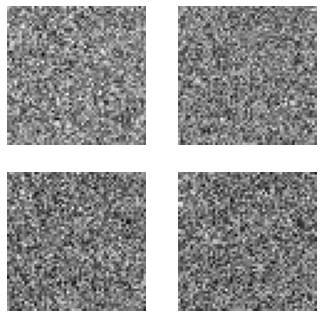

In [ ]:
image_grid_rows = 2
image_grid_columns = 2
z = np.random.normal(0, 1, (image_grid_rows*image_grid_columns ,z_dim))

gen_imgs = generator.predict(z)
gen_imgs = 0.5 * gen_imgs + 0.5 # [-1 1] --> [0 1]

fig, axs = plt.subplots(image_grid_rows,                                 
                            image_grid_columns,
                            figsize=(gen_imgs.shape[1]/10, gen_imgs.shape[2]/10),
                            sharey=True,
                            sharex=True)


cnt = 0
for i in range(image_grid_rows):
    for j in range(image_grid_columns):
        axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')           
        axs[i, j].axis('off')
        cnt += 1

